In [173]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [174]:
path_to_data = 'https://raw.githubusercontent.com/esnet/daphne/master/Multivariate-TimeSeries/Conext/link_csvs/pnwg_denv_in.csv?token=AKKJU5X37MO6DZYC2IVYVCC5VVEEK'

In [175]:
df = pd.read_csv(path_to_data)

In [176]:
df.head()

,Days,L1-bandwidth
0,16/10/2018 00:00,298.226302
1,16/10/2018 01:00,237.435717
2,16/10/2018 02:00,204.150128
3,16/10/2018 03:00,142.584069
4,16/10/2018 04:00,429.305359


In [177]:
df.tail()

,Days,L1-bandwidth
2155,13/01/2019 19:00,167.239479
2156,13/01/2019 20:00,144.460714
2157,13/01/2019 21:00,151.510893
2158,13/01/2019 22:00,101.402963
2159,13/01/2019 23:00,101.769192


In [178]:
df.describe()

,L1-bandwidth
count,2160.000000
mean,300.894316
std,172.672024
min,0.000000
25%,187.643161
50%,262.867213
75%,365.734808
max,1607.521043


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 2 columns):
Days            2160 non-null object
L1-bandwidth    2160 non-null float64
dtypes: float64(1), object(1)
memory usage: 33.8+ KB


In [180]:
df.isnull().sum()

Days            0
L1-bandwidth    0
dtype: int64

In [181]:
df.dtypes

Days             object
L1-bandwidth    float64
dtype: object

Text(0.5,1,'bost_amst_out Link Speed Over Time In Hours')

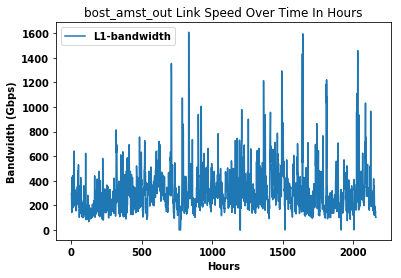

In [182]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Bandwidth (Gbps)')
plt.title('bost_amst_out Link Speed Over Time In Hours')

Text(0.5,1,'bost_amst_out Link Speed Over Time In Hours')

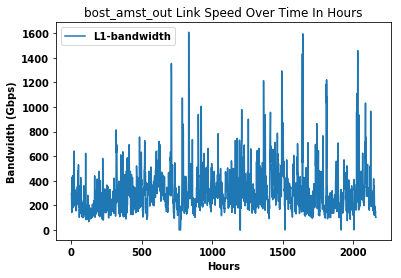

In [183]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Bandwidth (Gbps)')
plt.title('bost_amst_out Link Speed Over Time In Hours')

In [187]:
df['Days'] =  pd.to_datetime(df['Days'])

In [184]:
#df['Days'].dt.hour

In [ ]:
df['Days'].dt

In [185]:
df.dtypes

Days             object
L1-bandwidth    float64
dtype: object

In [188]:
df = df.set_index(df['Days'])

In [189]:
df.head(100)

,Days,L1-bandwidth
Days,,
2018-10-16 00:00:00,2018-10-16 00:00:00,298.226302
2018-10-16 01:00:00,2018-10-16 01:00:00,237.435717
2018-10-16 02:00:00,2018-10-16 02:00:00,204.150128
2018-10-16 03:00:00,2018-10-16 03:00:00,142.584069
2018-10-16 04:00:00,2018-10-16 04:00:00,429.305359
2018-10-16 05:00:00,2018-10-16 05:00:00,183.188281
2018-10-16 06:00:00,2018-10-16 06:00:00,189.038677
2018-10-16 07:00:00,2018-10-16 07:00:00,205.286128
2018-10-16 08:00:00,2018-10-16 08:00:00,389.370656


In [156]:
df.tail()

,Days,L1-bandwidth
Days,,
2019-01-13 19:00:00,2019-01-13 19:00:00,167.239479
2019-01-13 20:00:00,2019-01-13 20:00:00,144.460714
2019-01-13 21:00:00,2019-01-13 21:00:00,151.510893
2019-01-13 22:00:00,2019-01-13 22:00:00,101.402963
2019-01-13 23:00:00,2019-01-13 23:00:00,101.769192


In [157]:
average_daily_speed = df.resample('D').mean()

In [ ]:
df.resample?

In [169]:
hourly_speed = df

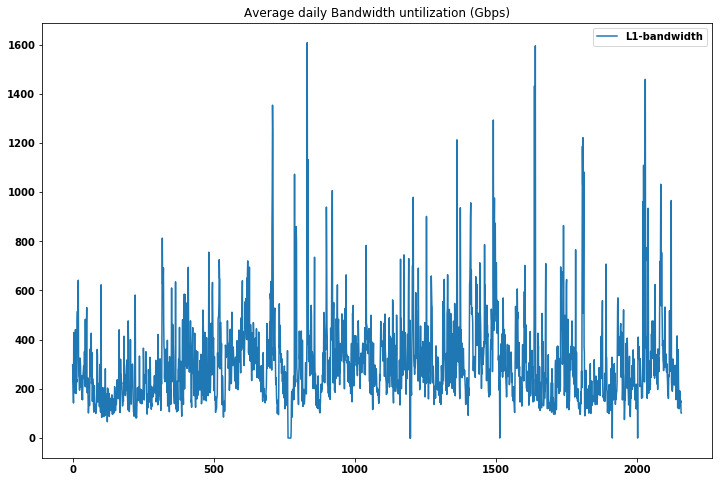

In [170]:
hourly_speed.plot()
plt.title('Average daily Bandwidth untilization (Gbps)')
plt.show()
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [171]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

In [47]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [48]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [49]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [50]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(hourly_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:31385.37024707308
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:30290.96054441381
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:29523.37929056412
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:28067.38853071777
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:29277.2403328147
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:28227.999877597384
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:28761.53880219061
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:28068.699362328716
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:29783.39444322709
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:29080.375031279662
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:28919.185407388977
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:27451.30548015942
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:28561.970940149404
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:27608.993549317456
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:28186.30917427416
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:27452.028577278426
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:27909.576319883636
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:277

In [263]:
#Lowest AIC : SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:709.973547601076

In [172]:
mod = sm.tsa.statespace.SARIMAX(hourly_speed,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

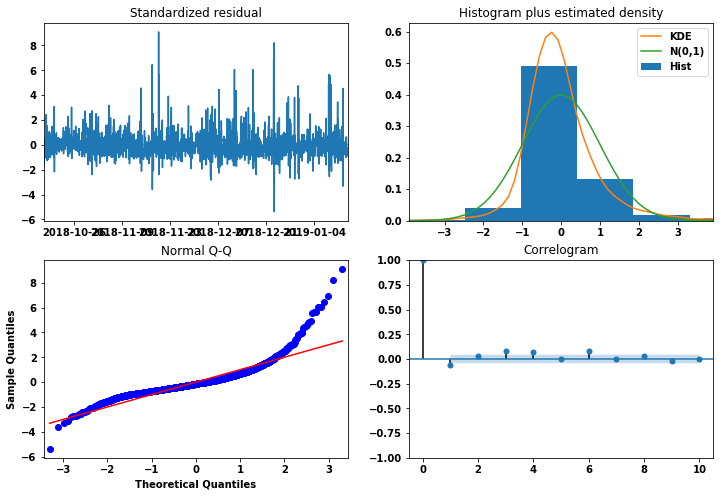

<Figure size 864x576 with 0 Axes>

In [53]:
results.plot_diagnostics()
plt.show()
plt.tight_layout()

In [164]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-20'), dynamic=False)
pred_ci = pred.conf_int()

In [165]:
ax = hourly_speed['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead prediction', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Bandwidth utilization (Gbps)')
plt.legend()

plt.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2018] of <class 'str'>

In [268]:
#df_mse = pd.read_csv('mse_aofa_lond_in.csv')
#df_mse = df_mse.set_index('Days')
#y_forecasted = df_mse['y_forecasted']
#y_truth = df_mse['y_truth']
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [57]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-12-20'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

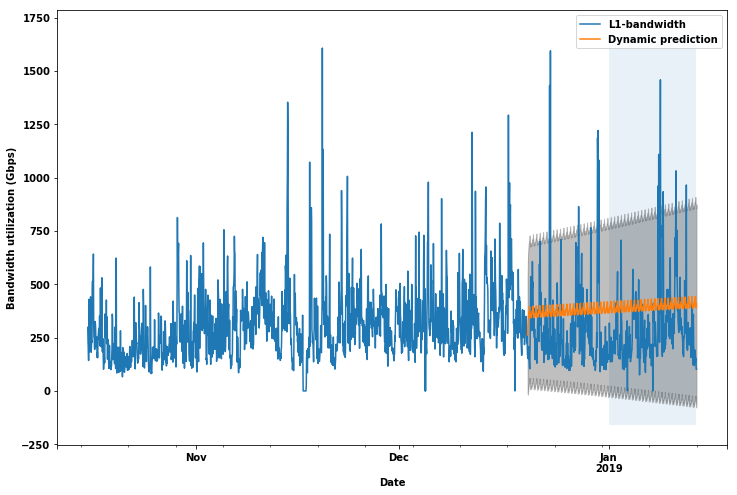

In [58]:
ax = hourly_speed['2018':].plot(label='observed')
pred_dynamic.predicted_mean.plot(label='Dynamic prediction', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-01'), hourly_speed.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Bandwidth utilization (Gbps)')

plt.legend()
plt.show()

In [65]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

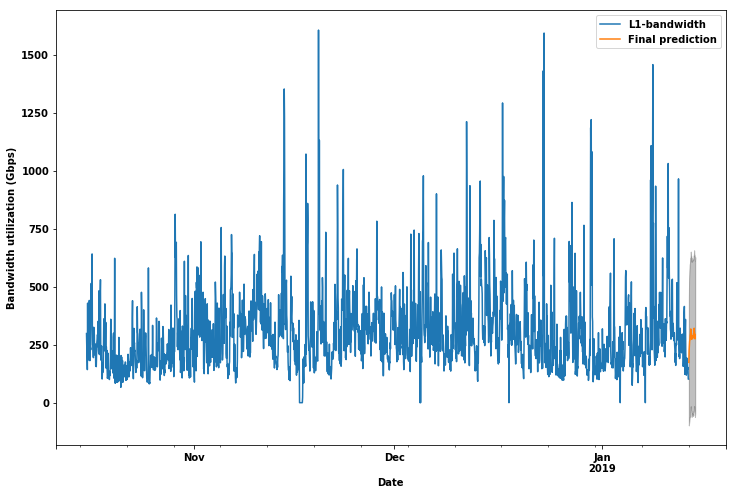

In [66]:
ax = hourly_speed.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Final prediction')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bandwidth utilization (Gbps)')

plt.legend()
plt.show()
#print(pred_ci.iloc[:, 1])

In [238]:
y_forecasted = pred.predicted_mean
y_truth = average_daily_speed['2018-12-20':]

In [239]:
y_forecasted=pd.DataFrame(y_forecasted, columns = ['L1-bandwidth'])

In [240]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is L1-bandwidth    9474.92
dtype: float64
The Root Mean Squared Error of our forecasts is L1-bandwidth    97.34
dtype: float64
